#  Import Libraries

In [1]:
!pip install jupyter-dash

In [2]:
!pip install dash-bootstrap-components

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# for visualization
from dash import Dash, html, dcc
import plotly.express as px
import matplotlib.pyplot as plt 

import pandas as pd
import jupyter_dash
from dash.dependencies import Input, Output, State
import numpy as np 
import dash
import dash_bootstrap_components as dbc
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"


# Prepare Data

### Read Data

In [4]:
survey_2017 = pd.read_csv("OSMI Mental Health in Tech Survey 2017.csv", na_values = np.nan)
survey_2017['year'] = '2017'
survey_2018 = pd.read_csv("OSMI Mental Health in Tech Survey 2018.csv", na_values = np.nan)
survey_2018['year'] = '2018'
survey_2019 = pd.read_csv("OSMI Mental Health in Tech Survey 2019.csv", na_values = np.nan)
survey_2019['year'] = '2019'
survey_2020 = pd.read_csv("OSMI Mental Health in Tech Survey 2020 .csv", na_values = np.nan)
survey_2020['year'] = '2020'
survey_data_ls = [survey_2017, survey_2018, survey_2019, survey_2020]
print(f"survey_2017.columns =  {len(survey_2017.columns)}")
print(f"survey_2018.columns =  {len(survey_2018.columns)}")
print(f"survey_2019.columns =  {len(survey_2019.columns)}")
print(f"survey_2020.columns =  {len(survey_2020.columns)}")

survey_2017.columns =  124
survey_2018.columns =  124
survey_2019.columns =  83
survey_2020.columns =  121


### Clean columns name and prepare data to be merged

In [5]:
import re as re
def remove_tags(string):
    result = re.sub('<.*?>|\*','',string)
    return result
for survey in survey_data_ls:
    renamed_cols = []
    for i in range (len(survey.columns)):
        renamed_cols.append(remove_tags(survey.columns[i]))
    survey.columns = renamed_cols


### Merge Data

In [6]:
important_feat =[
"Is your employer primarily a tech company/organization?",
"Is your primary role within your company related to tech/IT?",
"Does your employer provide mental health benefits as part of healthcare coverage?",
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
"Does your employer offer resources to learn more about mental health disorders and options for seeking help?",
"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",
"Overall, how much importance does your employer place on physical health?",
"Overall, how much importance does your employer place on mental health?",
"Do you currently have a mental health disorder?",
"Have you ever been diagnosed with a mental health disorder?",
"What disorder(s) have you been diagnosed with?",
"If possibly, what disorder(s) do you believe you have?",
"Have you had a mental health disorder in the past?",
"Do you have a family history of mental illness?",
"If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?",
"If you have a mental health disorder,how often do you feel that it interferes with your work when NOT* being treated effectively (i.e., when you are experiencing symptoms)?*",
"Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?",
"How wilm ling would you be to share with friends and family that you have a mental illness?",
"Would you be willing to bring up a physical health issue with a potential employer in an interview?",
"Would you bring up your mental health with a potential employer in an interview?",
"Are you openly identified at work as a person with a mental health issue?",
"Has being identified as a person with a mental health issue affected your career?",
"How has it affected your career?",
"If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?",
"Have you observed or experienced a supportive or well handled response to a mental health issue in your current or previous workplace?",
"Overall, how well do you think the tech industry supports employees with mental health issues?",
"Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.",
"What is your age?",
"What is your gender?",
"What country do you live in?",
"What country do you work in?", 
'year']
common_cols = (survey_2017.columns & survey_2020.columns & survey_2019.columns & survey_2018.columns & important_feat)
survey = pd.concat([survey_2017[common_cols], survey_2018[common_cols], survey_2019[common_cols], survey_2020[common_cols]], axis=0)
print(f"survey final columns =  {len(survey.columns)}")

survey final columns =  25


In [7]:
common_cols

Index(['Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Overall, how much importance does your employer place on physical health?',
       'Overall, how much importance does your employer place on mental health?',
       'Do you currently have a mental health disorder?',
       'Have you ever been diagnosed with a mental health disorder?',
       'Have you had a mental health disorder in the past?',
       'Do you have a family history of mental illness?',
       'If you have a mental health disorde

# Data Pre-processing

### `01` Drop Nulls

In [8]:
nulls_df = ((survey.isnull().sum()/survey.shape[0])*100).sort_values(ascending=False).reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count
0,How has it affected your career?,95.601173
1,Has being identified as a person with a mental...,87.976540
2,Have you ever been diagnosed with a mental hea...,58.181818
3,Briefly describe what you think the industry a...,30.850440
4,Have your observations of how another individu...,21.290323
5,Is your primary role within your company relat...,14.193548
6,Is your employer primarily a tech company/orga...,14.193548
7,If a mental health issue prompted you to reque...,14.193548
8,Has your employer ever formally discussed ment...,14.193548
9,"Overall, how much importance does your employe...",14.193548


In [9]:
nulls_df = ((survey.isnull().sum()/survey.shape[0])*100).sort_values(ascending=False).reset_index().rename(columns = { 0 : "Nulls_Count"})
# drop na values which have null values < threshold 
dropped_rows = nulls_df[nulls_df['Nulls_Count'] <= 14.0] 
dropped_rows = list(dropped_rows[dropped_rows['Nulls_Count'] > 0].values[:,0])
## when the number of nulls in a row is very small, we can simply drop this small number of rows
survey = survey.dropna(axis = 0, subset = dropped_rows)


# drop the columns which have null values > threshold  
dropped_cols = nulls_df[nulls_df['Nulls_Count'] > 50]
dropped_cols = list(dropped_cols.values[:,0])
survey = survey.drop(columns = dropped_cols)
nulls_df[nulls_df['Nulls_Count'] > 0]


,index,Nulls_Count
0,How has it affected your career?,95.601173
1,Has being identified as a person with a mental...,87.976540
2,Have you ever been diagnosed with a mental hea...,58.181818
3,Briefly describe what you think the industry a...,30.850440
4,Have your observations of how another individu...,21.290323
5,Is your primary role within your company relat...,14.193548
6,Is your employer primarily a tech company/orga...,14.193548
7,If a mental health issue prompted you to reque...,14.193548
8,Has your employer ever formally discussed ment...,14.193548
9,"Overall, how much importance does your employe...",14.193548


### `02` Clean Data

In [10]:
# ------------------------------------------------------- CLEANING THE DATA -------------------------------------------------------
# Column rename
df = survey.copy()
renamed_columns = ['tech_comp_flag', 'tech_role_flag', 'mh_employer_discussion_or_wellness_campaign', 'mh_resources_provided', 'mh_issue_request_medical_leave',
'ph_employer_rate', 'mh_employer_rate', 'curr_have_mh_disorder', 'past_have_mh_disorder', 'fam_history', 
'how often do you feel that it interferes with your work when being treated effectively?', 'smone_disscussion_reveal_ur_mh', 'admit_ph_issue_in_interview',
'admit_mh_issue_in_interview', 'openly_id_as_person_wth_mh_issue', 'rate_tech_industry_support',
'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 
'age', 'gender', 'country_live_in', 'country_work_in', 'year']
df.columns = renamed_columns
# gender column needs to be recoded (number of unique values = 70)
df['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ', 'cisgender male', 'MAle'
       'Cis Male', 'Male (trans, FtM)', 'mostly male', 'Masculine', 'Let\'s keep it simple and say "male"', 'cis-male', 'Mail', 'male/androgynous ',
       'cis hetero male',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

df['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       'Female (cis)', 'FEMALE', 'femmina' 'Agender trans woman', 'Female-identified',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender', 'female, she/her',
       'Nonbinary/femme', 'gender non-conforming woman', 'Female/gender non-binary.',
       'Cis woman', 'Female (cisgender)', 'Cis-Female','Cisgendered woman', 'Trans woman',
       'uhhhhhhhhh fem genderqueer?', 'My sex is female.', 'femalw', 'femail', 'cis female', 'femmina','Female-ish',
       'Woman-identified', 'female (cisgender)', 'Female (cis) ','F, cisgender', 'Trans female', 'Femile',
       'AFAB'], value = 2, inplace = True)

other = list(df['gender'].unique())
other = [o for o in other if o not in (1, 2)]
df['gender'].replace(to_replace = other , value = 3, inplace = True)

# Recode Comp size & country columns (for ease when doing plots)
df['country_live_in'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_live_in'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df['country_work_in'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_work_in'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

# Max age is 323, min age is 3.
# There are only 5 people that have weird ages (3yo, 15yo, or 99yo or 323 yo.) 
# These people will take the average age of the dataset (the correct calculated one, w/out outliers)
mean_age = df[(df['age'] >= 18) | (df['age'] <= 75)]['age'].mean()
df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)


### `03` Imputation

In [11]:
# Dealing with other missing values
from sklearn.impute import SimpleImputer

# Impute nan with the most frequent value (mode) on every row
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df)
imp_data = pd.DataFrame(data = imp.transform(df), columns = df.columns)
prep_data = imp_data.copy()

In [12]:
!pip install openpyxl


In [13]:
prep_data.to_excel('2017890.xlsx')


In [14]:
prep_data.dtypes


tech_comp_flag                                                                                                                       object
tech_role_flag                                                                                                                       object
mh_employer_discussion_or_wellness_campaign                                                                                          object
mh_resources_provided                                                                                                                object
mh_issue_request_medical_leave                                                                                                       object
ph_employer_rate                                                                                                                     object
mh_employer_rate                                                                                                                     object
curr_have_mh_disorde

In [15]:
prep_data['year'] = prep_data['year'].astype('int')


In [16]:
prep_data.to_excel('2017890.xlsx')


### `04` Encoding categorical Data 

In [17]:
num_data = list((df.select_dtypes(exclude=[object])))
cat_data = list(df.select_dtypes(include=[object]))
nominal_data = ['year', 'country_live_in', 'country_work_in', 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']
ordinal_data = list(set(cat_data) - set(num_data) - set(nominal_data)) 


In [18]:
# ----------- ENCODING -----------
# Diviser les données en 2 ensembles de données : un qui doit être encodé, un qui ne doit pas l'être.
# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def encode(df, ordinal_data):
    encoded_data = pd.DataFrame() # to dataframe
    le = LabelEncoder()
    
    for col in ordinal_data:
        encoded_data[col] = le.fit_transform(df[col])
    
    return encoded_data

encoded_data = encode(prep_data, ordinal_data)

# Preprocessed data
data_not_encode_df = prep_data[nominal_data + num_data]
prep_data = pd.concat(objs = [encoded_data, data_not_encode_df], axis = 1)
prep_data.head(5)

,past_have_mh_disorder,mh_issue_request_medical_leave,admit_mh_issue_in_interview,mh_employer_discussion_or_wellness_campaign,admit_ph_issue_in_interview,tech_role_flag,mh_resources_provided,smone_disscussion_reveal_ur_mh,fam_history,tech_comp_flag,...,year,country_live_in,country_work_in,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,ph_employer_rate,mh_employer_rate,openly_id_as_person_wth_mh_issue,rate_tech_industry_support,age,gender
0,2,1,1,1,2,1,0,1,1,1,...,2017,UK,UK,They don't take it seriously,6.0,0.0,0.0,1.0,27.0,2
1,2,1,1,1,2,1,1,1,1,1,...,2017,UK,UK,"raise awareness, talk about it to lessen the s...",7.0,2.0,0.0,2.0,31.0,1
2,3,0,1,0,0,1,1,2,2,1,...,2017,USA,USA,"Education and awareness, statistics, add suppo...",0.0,1.0,1.0,1.0,36.0,1
3,1,0,1,0,1,1,0,1,0,1,...,2017,USA,USA,"More support, less burnout and death marches",7.0,5.0,0.0,2.0,22.0,1
4,3,4,1,1,0,1,1,1,2,1,...,2017,USA,USA,I think tech is more internal and they don't r...,7.0,5.0,0.0,1.0,52.0,2


In [19]:
# ----------- OTHER CHANGES -----------
# Keep only countries with no. responses > 20
prep_data = prep_data[prep_data['country_work_in'].isin(['USA', 'UK', 'India', 'Canada', 
                                                   'Germany'])]
prep_data = prep_data[prep_data['country_live_in'].isin(['USA', 'UK', 'India', 'Canada', 
                                                   'Germany'])]
# clean Rates Columns 
prep_data['mh_employer_rate'] = prep_data['mh_employer_rate'].fillna(0)
prep_data['ph_employer_rate'] = prep_data['ph_employer_rate'].fillna(0)


In [20]:
prep_data['tech_role_flag'].value_counts()

1    1246
0      82
Name: tech_role_flag, dtype: int64

# Visualisation and Insights

In [21]:
country = 'USA'

### Responses Gender (only techs) Vs Country


In [22]:
# Most respondents are Male
## ----------------- Pie Chart For Gender Vs Techs -----------------
def draw_Techs_by_gender(country):
    all_techs = prep_data[prep_data['tech_role_flag'] == 1]['gender'].count()
    males = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['gender'] == 1.0)& ( np.isin(prep_data['country_work_in'], country))]['gender'].count()
    females = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['gender'] == 2.0)& ( np.isin(prep_data['country_work_in'], country))]['gender'].count()
    other = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['gender'] == 3.0)& ( np.isin(prep_data['country_work_in'], country))]['gender'].count()

    colors = ["#b3dad7", "#FF92A5"]
    Techs_by_gender_fig = go.Figure(data=[go.Pie(labels=['Male', 'Female'], 
                                    values=[round(males/all_techs * 100), round(females/ all_techs * 100)])])

    Techs_by_gender_fig.update_traces(hoverinfo='label+percent', textfont_size=16, title_font_size = 24,  title_position = "middle center",
                                    marker=dict(colors=colors,
                                    line=dict(color='#FFF', width=2)),
                                    )
    Techs_by_gender_fig.update_layout(
                                    legend=dict(orientation="h", yanchor="bottom", y=-0.1, xanchor="center", x=0.5),
                                    margin=dict(b = 0, t = 0, l = 0, r = 0),
                                    height = 325
                                    )
    return Techs_by_gender_fig
draw_Techs_by_gender(country)


### Have Mental Health Disorder Vs Country

In [23]:
# ----------------- Pie Chart For MH Disorder Vs Techs -----------------
all_techs_now = prep_data[prep_data['tech_role_flag'] == 1]['curr_have_mh_disorder'].count()
no_now = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['curr_have_mh_disorder'] == 2) & ( np.isin(prep_data['country_work_in'], country))]['curr_have_mh_disorder'].count()
yes_now = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['curr_have_mh_disorder'] == 3) & ( np.isin(prep_data['country_work_in'], country))]['curr_have_mh_disorder'].count()
maybe_now = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['curr_have_mh_disorder'] == 1) & ( np.isin(prep_data['country_work_in'], country))]['curr_have_mh_disorder'].count()
dnt_know = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['curr_have_mh_disorder'] == 0) & ( np.isin(prep_data['country_work_in'], country))]['curr_have_mh_disorder'].count()

labels = ['Possibly', 'Yes', 'No', "Don't Know"]
sizes = [no_now/all_techs_now, yes_now/all_techs_now, maybe_now/all_techs_now, dnt_know/all_techs_now]

MH_disorder_by_country_fig = go.Figure(data=[go.Pie(labels = labels, values=sizes)])

MH_disorder_by_country_fig.update_traces(title = 'Overall Mental Health prop%', hoverinfo='label+percent', textfont_size=12, title_font_size = 24, title_position = "middle center",
                  marker=dict(line=dict(color='#FFF', width=2)), showlegend = True
                  )
MH_disorder_by_country_fig.update_layout(
              template = 'ggplot2',
              legend=dict(orientation="h", yanchor="bottom", y=-0.1, xanchor="center", x=0.5),
              margin=dict(b = 0, t = 0, l = 0, r = 0),
              )
MH_disorder_by_country_fig.show()

### Age Vs MH prob Vs Country

In [24]:
def draw_Age_Vs_MH_prob_Vs_Country (country) :
    bins = [20, 26, 31, 36, 41, 46, 51, 56]
    labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '50-55', '55+']
    
    age_by_county  = prep_data[(prep_data['tech_role_flag'] == 1 ) & ( np.isin(prep_data['country_work_in'], country))][['age']]
    # grouping ages
    age_by_county['range'] = pd.cut(age_by_county.age, bins, labels = labels,include_lowest = True)
    #count values
    age_by_county = age_by_county.groupby(by =['range']).size().rename('Count').reset_index().sort_values(by = ['range'])
    
    Age_Vs_MH_prob_Vs_Country = px.line(age_by_county, x = 'range', y = 'Count')
    Age_Vs_MH_prob_Vs_Country.update_layout(margin=dict(b = 0, t = 0, l = 0, r = 0), height = 350, template = 'seaborn')
    return Age_Vs_MH_prob_Vs_Country
draw_Age_Vs_MH_prob_Vs_Country (country)

### Yes have a mental health problem response in country Vs years 

In [25]:
# total Num among year 
years = pd.DataFrame(['2017', '2018', '2019', '2020'])
total_2017 = prep_data [(prep_data['year'] == '2017') & ( np.isin(prep_data['country_work_in'], country))].shape[0]
total_2018 = prep_data [(prep_data['year'] == '2018') & ( np.isin(prep_data['country_work_in'], country))].shape[0]
total_2019 = prep_data [(prep_data['year'] == '2019') & ( np.isin(prep_data['country_work_in'], country))].shape[0]
total_2020 = prep_data [(prep_data['year'] == '2020') & ( np.isin(prep_data['country_work_in'], country))].shape[0]
total_to_be_divided =pd.DataFrame([total_2017, total_2018, total_2019, total_2020]).rename(columns = {0:'count'})
total_to_be_divided = pd.concat([years ,total_to_be_divided], axis= 1).rename(columns = {0 : "year"})

# Mental health Prob preparation
Mh_by_year  = prep_data[(prep_data['curr_have_mh_disorder'] == 3 ) & ( np.isin(prep_data['country_work_in'], country))][['year']]
Mh_by_year = pd.DataFrame(Mh_by_year.groupby(by=['year'])['year'].size().rename('Count').reset_index().sort_values(by = ['year'])['Count'])
avg = pd.DataFrame((Mh_by_year['Count'])/ total_to_be_divided['count'] * 100).round(0)
avg_Mh_by_year = pd.concat([years ,avg], axis= 1)
avg_Mh_by_year.columns = ['year', 'avg']

# plot
fig = px.line(avg_Mh_by_year, x='year', y='avg', width = 1000, markers = True, title = 'Mental Health Problems In Tech Industry among years ', range_y =[0, 100])
fig.add_bar( x=avg_Mh_by_year['year'], y=avg_Mh_by_year['avg'])
fig.update_layout(
    width = 700,
    height = 400,
    barmode='group', 
    title="Mental Health problem among years",
    xaxis_title="year",
    yaxis_title="Percent",
    legend_title="Have Mental Health Problem?",
    )
fig.show()

### All responses in Countries Vs years 

In [26]:
def draw_curr_mh_by_country_plt (country):

    ####################################### Calculation #######################################
    # total Num among year 
    total_to_be_divided = prep_data[( np.isin(prep_data['country_work_in'], country))].groupby(by = ['year']).size().reset_index().rename(columns ={ 0 :f'no_samples'}).sort_values(by = ['year'])
    # create the avg DF for the responses per year 
    avg_Mh_by_year = total_to_be_divided.copy().rename(columns = {0:'years'})
    for i in range(4):
        MH_Prob_ans  = prep_data[(prep_data['curr_have_mh_disorder'] == i ) & ( np.isin(prep_data['country_work_in'], country))][['year']].groupby(by=['year']).size().reset_index().rename(columns ={ 0 :f'Count_{i}'}).sort_values(by = ['year'])
        avg_df = (MH_Prob_ans[f'Count_{i}'] /  total_to_be_divided['no_samples'] * 100).round(0)
        avg_Mh_by_year = pd.concat([avg_Mh_by_year, avg_df], axis = 1).rename(columns ={ 0 :f'Count_{i}'})
    avg_Mh_by_year['avg'] = (avg_Mh_by_year['Count_3'] + avg_Mh_by_year['Count_2']) - (avg_Mh_by_year['Count_1'] + avg_Mh_by_year['Count_0'])
    avg_Mh_by_year
    # 0: No, 1:Don't Know, 2:possibly, 3:yes

    curr_mh_by_country = go.Figure(data=[
        go.Bar(name='No', x=avg_Mh_by_year['year'], y=avg_Mh_by_year['Count_0'], marker_color = '#f1e3dd'),
        go.Bar(name="Don't Know", x=avg_Mh_by_year['year'], y=avg_Mh_by_year['Count_1'], marker_color = '#bccad6'),
        go.Bar(name='Possibly', x=avg_Mh_by_year['year'], y=avg_Mh_by_year['Count_2'], marker_color = '#8d9db6'),
        go.Bar(name='Yes', x=avg_Mh_by_year['year'], y=avg_Mh_by_year['Count_3'], marker_color = '#6b5b95'),
    ])
    curr_mh_by_country.update_traces(marker_line_color='rgb(5,5,5)',marker_line_width=1)
    curr_mh_by_country.update_yaxes(range=[0, 100])
    curr_mh_by_country.update_layout(      
        barmode='group',
        xaxis_title="Year",
        yaxis_title="Percent",
        legend=dict(orientation="h", yanchor="bottom", y=0.90, xanchor="center", x=0.5),
        height = 350,
        margin=dict(b = 0, t = 0, l = 0, r = 0),
        )
    curr_mh_by_country.update_xaxes(categoryorder='array', categoryarray= ['2017', '2018', '2019', '2020'])
    return curr_mh_by_country
draw_curr_mh_by_country_plt (country)

### Yes have MH issue response in all countries Vs years

In [27]:
country = prep_data['country_work_in'].unique()
Mh_avg_no_samples  = prep_data[prep_data['tech_role_flag'] == 1 ][['year', 'country_work_in', 'curr_have_mh_disorder']]\
                    .groupby(by = ['year', 'country_work_in'])\
                    .size().reset_index().sort_values(by=['year','country_work_in']).rename(columns = {0 : 'no.samples'})

In [28]:
Mh_avg  = prep_data[(prep_data['tech_role_flag'] == 1 ) & ( np.isin(prep_data['country_work_in'], country))][['year', 'country_work_in', 'curr_have_mh_disorder']]\
            .groupby(by = ['year', 'country_work_in', 'curr_have_mh_disorder' ])\
            .size().reset_index().sort_values(by=['year','country_work_in']).rename(columns = {0 : 'count'})
Mh_avg['Avg'] = 0 

In [29]:
for outer_row, outer_col in Mh_avg_no_samples.iterrows() :
    avg_year = outer_col['year']
    avg_country_work_in = outer_col['country_work_in']
    no_samples = outer_col['no.samples']
    for inside_row, inside_col in Mh_avg.iterrows() :
        year = inside_col['year']
        country_work_in = inside_col['country_work_in']
        count = inside_col['count']
        Avg = inside_col['Avg']
        print(no_samples)
        if year == avg_year and country_work_in == avg_country_work_in:
            Mh_avg['Avg'][inside_row] = round((count / no_samples) * 100)
#prepare dfs
yes_Mh_avg = Mh_avg[Mh_avg['curr_have_mh_disorder'] == 3]
possibly_Mh_avg = Mh_avg[Mh_avg['curr_have_mh_disorder'] == 2]
No_Mh_avg = Mh_avg[Mh_avg['curr_have_mh_disorder'] == 1]
dntKnow_Mh_avg = Mh_avg[Mh_avg['curr_have_mh_disorder'] == 0]

22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453
453


In [30]:
def draw_MH_response_all_countries_Vs_years():
    MH_response_all_countries_Vs_years = px.line(yes_Mh_avg, x='year', y='Avg', color='country_work_in',  markers=True, range_y=[-5,100], template = 'seaborn')
    MH_response_all_countries_Vs_years.update_traces(marker_line_color='rgb(5,5,5)',marker_line_width=1, line=dict(width=5))
    MH_response_all_countries_Vs_years.update_layout(
        barmode='group', 
        xaxis_title="year",
        yaxis_title="Percent",
        legend_title="Countries",
        legend=dict(orientation="h", yanchor="bottom", y=0.90, xanchor="center", x=0.5),
        margin=dict(b = 0, t = 0, l = 0, r = 0),
        height = 410,
        
        )
    return MH_response_all_countries_Vs_years
draw_MH_response_all_countries_Vs_years()

### World Wide Tech Industry Support Rate

In [31]:
# make the oservations among the whole world 
df2 = df.copy()
df2[['country_work_in', 'ph_employer_rate', 'mh_employer_rate']].dropna()
df2.sort_values(['country_work_in','mh_resources_provided'],inplace=True)
def draw_observation_map_among_world():
  observation_map_among_world=px.choropleth(data_frame=df2,locations='country_live_in',locationmode='country names',
                    color='rate_tech_industry_support',
                    hover_name='country_work_in',
                    hover_data=['country_work_in', 'mh_employer_rate', 'ph_employer_rate'],
                    scope='world',
                    template = 'ggplot2', 
                  )

  observation_map_among_world.update_layout(
                  coloraxis_colorbar = dict(ticks='outside', title = 'Rate : ', orientation='v', yanchor="bottom", y= 0.18, xanchor="left", x = 0 , len = 0.37, thickness = 15 ),
                  margin=dict(b = 0, t = 0, l = 0, r = 0),
                  height = 400,
                  )
                
  return observation_map_among_world

draw_observation_map_among_world()

### What you think the industry as a whole and/or employers could do to improve mental health support for employees?

In [32]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



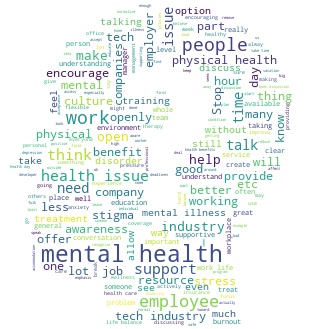

In [33]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

def draw_world_cloud():
    Emp_complains = prep_data['Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.'].dropna().unique()
    words = ''.join(Emp_complains)

    my_wordcloud = WordCloud(stopwords=STOPWORDS,
                            max_words=500,
                            # width=800,
                            height=400,
                            background_color='white',
                            contour_color='#EEEDE7', 
                            colormap="viridis",
                            collocations=True,
                            # contour_width=5, 
                            mask=np.array(Image.open("b2.jpg"))).generate(words)

    fig_wordcloud = px.imshow(my_wordcloud)
    fig_wordcloud.update_layout(margin=dict(l=0, r=0, t=0, b=0), height=400)
    fig_wordcloud.update_xaxes(visible=False)
    fig_wordcloud.update_yaxes(visible=False)
    return fig_wordcloud
draw_world_cloud()

### Would you be willing to bring up a physical/ Mental health issue with a potential employer in an interview?

#### Pie charts for all responses

In [34]:
# ----------------- Admit_ph_issue_in_interview_plt -----------------
def draw_admit_ph_issue_in_interview_plt(country):
    all_responses = prep_data[prep_data['tech_role_flag'] == 1]['admit_ph_issue_in_interview'].count()
    no = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['admit_ph_issue_in_interview'] == 0) & ( np.isin(prep_data['country_work_in'], country))]['admit_ph_issue_in_interview'].count()
    maybe = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['admit_ph_issue_in_interview'] == 1) & ( np.isin(prep_data['country_work_in'], country))]['admit_ph_issue_in_interview'].count()
    yes = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['admit_ph_issue_in_interview'] == 2) & ( np.isin(prep_data['country_work_in'], country))]['admit_ph_issue_in_interview'].count()

    labels = ['No', 'Maybe', 'Yes']
    # colors = ['#9666FF', '#F89640', '#F0F921' ]
    colors = ['#622569', '#b7d7e8', '#5b9aa0' ]

    sizes = [no/all_responses, maybe/all_responses, yes/all_responses]

    admit_ph_issue_in_interview_plt = go.Figure(data=[go.Pie(labels = labels, values=sizes, hole = 0.6, pull=[0, 0, 0.2, 0], rotation = 90)])

    admit_ph_issue_in_interview_plt.update_traces(
                                                title = f'Physical',
                                                hoverinfo='label+percent',
                                                textfont_size=12,
                                                marker=dict(colors=colors,
                                                line=dict(color='#FFF', width=2)),
                                                title_font_size = 16,
                                                title_position = "middle center")
    admit_ph_issue_in_interview_plt.update_layout(
                                                legend=dict(orientation="h", yanchor="bottom", y=0, xanchor="center", x=0.5),
                                                margin=dict(b = 0, t = 0, l = 0, r = 0),
                                                template = 'ggplot2',
                                                height = 325
                                                )
    return admit_ph_issue_in_interview_plt
# ----------------- Bar Chart For MH Disorder Vs Countries -----------------

def draw_admit_mh_issue_in_interview_plt(country):
    all_responses = prep_data[prep_data['tech_role_flag'] == 1]['admit_mh_issue_in_interview'].count()
    no = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['admit_mh_issue_in_interview'] == 1) & ( np.isin(prep_data['country_work_in'], country))]['admit_mh_issue_in_interview'].count()
    maybe = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['admit_mh_issue_in_interview'] == 0) & ( np.isin(prep_data['country_work_in'], country))]['admit_mh_issue_in_interview'].count()
    yes = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['admit_mh_issue_in_interview'] == 2) & ( np.isin(prep_data['country_work_in'], country))]['admit_mh_issue_in_interview'].count()
    colors = ['#9666FF', '#F89640', '#F0F921' ]
    #colors = ['#622569', '#b7d7e8', '#5b9aa0' ]

    labels = ['No', 'Maybe', 'Yes']
    sizes = [no/all_responses, maybe/all_responses, yes/all_responses]
    admit_mh_issue_in_interview_plt = go.Figure(data=[go.Pie(labels = labels, values=sizes, hole = 0.6, pull=[0, 0, 0.2, 0], rotation = -180)])

    admit_mh_issue_in_interview_plt.update_traces(
                                                title = 'Mental',
                                                hoverinfo='label+percent',
                                                marker=dict(colors=colors,
                                                line=dict(color='#FFF', width=2)),
                                                textfont_size=12,
                                                title_font_size = 16, 
                                                title_position = "middle center")
    admit_mh_issue_in_interview_plt.update_layout(
                                                template = 'ggplot2',
                                                legend=dict(orientation="h", yanchor="bottom", y=0, xanchor="center", x=0.5),
                                                margin=dict(b = 0, t = 0, l = 0, r = 0),
                                                height = 325
                                                )

    return admit_mh_issue_in_interview_plt



In [35]:
draw_admit_ph_issue_in_interview_plt(country)

In [36]:
draw_admit_mh_issue_in_interview_plt(country)

#### line chart for yes responses Vs years years

In [37]:
def draw_MH_interview (country): 

   admit_ph_issue_in_interview  = prep_data[prep_data['tech_role_flag'] == 1 ][['year', 'country_work_in', 'admit_ph_issue_in_interview']]\
            .groupby(by = ['year', 'country_work_in'])\
            .size().reset_index().sort_values(by=['year','country_work_in']).rename(columns = {0 : 'no.samples'})
   admit_mh_issue_in_interview  = prep_data[prep_data['tech_role_flag'] == 1 ][['year', 'country_work_in', 'admit_mh_issue_in_interview']]\
               .groupby(by = ['year', 'country_work_in'])\
               .size().reset_index().sort_values(by=['year','country_work_in']).rename(columns = {0 : 'no.samples'})

   ####------------------- admit physical health problems in an interview -----------------####
   #### Get the avarage of each country by its own (yes, no, maybe) / no.samples each years to avoid imbalance 
   ## build my dataframe
   admit_ph_issue_in_interview_avg  = prep_data[(prep_data['tech_role_flag'] == 1 ) & ( np.isin(prep_data['country_work_in'], country))][['year', 'country_work_in', 'admit_ph_issue_in_interview']]\
               .groupby(by = ['year', 'country_work_in', 'admit_ph_issue_in_interview' ])\
               .size().reset_index().sort_values(by=['year','country_work_in']).rename(columns = {0 : 'count'})
   admit_ph_issue_in_interview_avg['Avg'] = 0 
   ## get the avarage for each country
   for outer_row, outer_col in admit_ph_issue_in_interview.iterrows() :
      avg_year = outer_col['year']
      avg_country_work_in = outer_col['country_work_in']
      no_samples = outer_col['no.samples']
      for inside_row, inside_col in admit_ph_issue_in_interview_avg.iterrows() :
         year = inside_col['year']
         country_work_in = inside_col['country_work_in']
         count = inside_col['count']
         Avg = inside_col['Avg']
         if year == avg_year and country_work_in == avg_country_work_in:
               admit_ph_issue_in_interview_avg['Avg'][inside_row] = round((count / no_samples) * 100)
   ## my responses for each country   
   yes_for_ph = admit_ph_issue_in_interview_avg[admit_ph_issue_in_interview_avg['admit_ph_issue_in_interview'] == 2]
   No_for_ph = admit_ph_issue_in_interview_avg[admit_ph_issue_in_interview_avg['admit_ph_issue_in_interview'] == 1]
   maybe_for_ph = admit_ph_issue_in_interview_avg[admit_ph_issue_in_interview_avg['admit_ph_issue_in_interview'] == 0]

   ####------------------ admit Mental health problems in an interview -------------------####

   #### Get the avarage of each country by its own (yes, no, maybe) / no.samples each years to avoid imbalance 
   ## build my dataframe
   admit_mh_issue_in_interview_avg  = prep_data[(prep_data['tech_role_flag'] == 1 ) & ( np.isin(prep_data['country_work_in'], country))][['year', 'country_work_in', 'admit_mh_issue_in_interview']]\
               .groupby(by = ['year', 'country_work_in', 'admit_mh_issue_in_interview' ])\
               .size().reset_index().sort_values(by=['year','country_work_in']).rename(columns = {0 : 'count'})
   admit_mh_issue_in_interview_avg['Avg'] = 0 
   ## get the avarage for each country
   for outer_row, outer_col in admit_mh_issue_in_interview.iterrows() :
      avg_year = outer_col['year']
      avg_country_work_in = outer_col['country_work_in']
      no_samples = outer_col['no.samples']
      for inside_row, inside_col in admit_mh_issue_in_interview_avg.iterrows() :
         year = inside_col['year']
         country_work_in = inside_col['country_work_in']
         count = inside_col['count']
         Avg = inside_col['Avg']
         if year == avg_year and country_work_in == avg_country_work_in:
               admit_mh_issue_in_interview_avg['Avg'][inside_row] = round((count / no_samples) * 100)
   ## my responses for each country   
   yes_for_mh = admit_mh_issue_in_interview_avg[admit_mh_issue_in_interview_avg['admit_mh_issue_in_interview'] == 2]
   No_for_mh = admit_mh_issue_in_interview_avg[admit_mh_issue_in_interview_avg['admit_mh_issue_in_interview'] == 1]
   maybe_for_mh = admit_mh_issue_in_interview_avg[admit_mh_issue_in_interview_avg['admit_mh_issue_in_interview'] == 0]

   ################################################## Plot  ####################################################
   MH_interview = go.Figure()
   MH_interview.add_trace(go.Scatter(x=yes_for_ph['year'], y=yes_for_ph['Avg'], name='Physical',
                           line=dict(color='#622569', width=4)))
   MH_interview.add_trace(go.Scatter(x=yes_for_mh['year'], y=yes_for_mh['Avg'], name='Mental',
                           line=dict(color='#5b9aa0', width=4, dash='dash')))

   MH_interview.update_yaxes(range = [0, 100])
   MH_interview.update_layout(
                     xaxis_title='Year',
                     yaxis_title='Percent', 
                     legend=dict(xanchor = 'right', x = 1),
                     legend_title = (f'IN {country} : '),
                     margin=dict(b = 0, t = 0, l = 0, r = 0),
                     title_font_size = 14,
                     height = 350 
                     )
   return MH_interview
draw_MH_interview ("USA")

### Does your employer offer resources/ wellness campaign to learn more about mental health disorders and options for seeking help?

In [38]:
# -----------------mh_resources_provided -----------------
def draw_mh_resources_provided_plt(country):
        all_responses = prep_data[prep_data['tech_role_flag'] == 1]['mh_resources_provided'].count()
        dntKnow = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['mh_resources_provided'] == 0) & ( np.isin(prep_data['country_work_in'], country))]['mh_resources_provided'].count()
        no = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['mh_resources_provided'] == 1) & ( np.isin(prep_data['country_work_in'], country))]['mh_resources_provided'].count()
        yes = prep_data[(prep_data['tech_role_flag'] == 1) & (prep_data['mh_resources_provided'] == 2) & ( np.isin(prep_data['country_work_in'], country))]['mh_resources_provided'].count()
        labels = ['No', "I don't know", 'Yes']
        # colors = ['#9666FF', '#F89640', '#F0F921']
        colors = ['#622569', '#b7d7e8', '#5b9aa0' ]

        sizes = [no/all_responses, dntKnow/all_responses, yes/all_responses]

        mh_resources_provided_plt = go.Figure(data=[go.Pie(labels = labels, values=sizes, hole = 0.6, pull=[0, 0, 0.15, 0], rotation = 30)])

        mh_resources_provided_plt.update_traces(title = 'Resources Provided',
                                                marker=dict(colors=colors,
                                                line=dict(color='#FFF', width=2)),
                                                hoverinfo='label+percent',
                                                textfont_size=12,
                                                title_font_size = 15, 
                                                title_position = "middle center")
        mh_resources_provided_plt.update_layout(legend=dict(orientation="h", yanchor="bottom", y=0, xanchor="center", x=0.5),
                                                margin=dict(t = 0, b=0, l = 0, r = 0),
                                                height = 400
                                                )
        return mh_resources_provided_plt

draw_mh_resources_provided_plt(country)

### Mental Health Rating in all Countries Vs years 

In [39]:
employer_rate  = prep_data[(prep_data['tech_role_flag'] == 1 ) & ( np.isin(prep_data['country_work_in'], country))][['country_work_in', 'ph_employer_rate', 'mh_employer_rate']]
employer_Ph_rate = employer_rate.groupby(by = ['ph_employer_rate']).size().reset_index().rename(columns = {0 : 'count'})
employer_mh_rate = employer_rate.groupby(by = ['mh_employer_rate']).size().reset_index().rename(columns = {0 : 'count'}) 

In [40]:
emp_place = go.Figure()
emp_place.add_trace(go.Scatter(x=employer_Ph_rate['ph_employer_rate'], y=employer_Ph_rate['count'], name='Physical',
                         line=dict(color='Blue', width=4)))
emp_place.add_trace(go.Scatter(x=employer_mh_rate['mh_employer_rate'], y=employer_mh_rate['count'], name='Mental',
                         line=dict(color='orange', width=4, dash='dash')))

# fig.update_yaxes(range = [0, 10])
emp_place.update_layout(
                   xaxis_title='Year',
                   yaxis_title='Count', 
                   legend=dict(xanchor = 'right', x = 1),
                   legend_title = (f'IN {country} : '),
                   title_font_size = 14,
                   )
emp_place.show()

In [41]:
def draw_curr_rate_by_country():
    curr_rate_by_country = go.Figure(data=[
        go.Bar(name="Physical", y=employer_Ph_rate['ph_employer_rate'].unique(), x=employer_Ph_rate['count'], marker_color = '#622569', orientation='h'),
        go.Bar(name='Mental', y=employer_mh_rate['mh_employer_rate'].unique(), x=employer_mh_rate['count'], marker_color = '#5b9aa0', orientation='h'),
    ])
    curr_rate_by_country.update_yaxes(type='category')
    curr_rate_by_country.update_layout(
        barmode='group', 
        xaxis_title="Count",
        yaxis_title="Rate",
        legend=dict(xanchor = 'right', x = 1),
        margin=dict(t = 0, b=0, l = 0, r = 0),
        height = 400,
        )
    return curr_rate_by_country
draw_curr_rate_by_country()

# Dashboard

In [42]:
import seaborn as sns
import matplotlib as plt
import plotly.express as px
import pandas as pd
from dash import Dash, html, dcc
from jupyter_dash import JupyterDash
from dash.dependencies import Input,Output,State
import dash_bootstrap_components as dbc
import numpy as np
import dash

In [43]:
Countries = ['USA', 'UK', 'India', 'Canada', 'Germany']

In [44]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP],
                meta_tags=[{'name': 'viewport',
                            'content': 'width=device-width, initial-scale=1.0'}]
                )
# Layout section
app.layout = dbc.Container([
    dbc.Row([
            dbc.Container([
                dbc.Row([
                    dbc.Row([html.Img(src="HEADER.jpeg")],style = {'width':'100%','background':'white'},className='',),
               ]),
            ]),
        ################################################## General Information #################################################            
        dbc.Container([
            dbc.Row([
               dbc.Row([
                    dbc.Col([html.H2("General Information",className='text-center divBorder p-2 m-1 font-weight-normal rounded',style={'font-family':'Calibri','background':'#b3dad7','color':'#525252'}),
                            ],width = 12),]),
               dbc.Row([
                    ################################################## Gender Overview #################################################            
                   dbc.Col([
                       dbc.Card([
                            dbc.CardHeader([
                                dcc.Dropdown(id='dp1', multi=False, value='USA',options=[{'label':x, 'value':x}for x in Countries],
                                            style={"textTransform": "uppercase",'border-color':'#b3dad7','background-color':'white','text-color':'white', 'width' : '250'},className = "dropdown open"),
                            ],className ='bg-white mb-1'),
                            dbc.CardBody([
                                dcc.Graph(id='line-fig1', figure=draw_Techs_by_gender(country),className=' m-1',),]),
                            dbc.CardFooter([html.H5("Gender Overview", className="card-text",style = {'color':'#525252'}),],className ='bg-white'),
                       ],className='shadow rounded card p-3 text-center m-1',style={"height":"32rem" , "border-color":"#808080","border-width": "medium"},),
                   ],xs=12, sm=12, md=12, lg=3, xl=3),
                    ############################################ Mental Health Problem Among Years #########################################            
                   dbc.Col([
                       dbc.Card([
                           dbc.CardBody([
                               dcc.Graph(figure=draw_MH_response_all_countries_Vs_years(),className=' m-1'),
                           dbc.CardFooter([html.H5("Mental Health Problem Among Years", className="card-text",style = {'color':'#525252'}),],className ='bg-white'),
                        ])
                    ],className='shadow rounded card p-3 text-center m-1',style={"height":"32rem","border-color":"#696969","border-width": "medium"})
                    ],xs=12, sm=12, md=12, lg=7, xl=7),
                    ################################################## Information Cards #################################################            
                   dbc.Col([
                        dbc.Card([
                            dbc.CardImg(src="mh.png",className="align-self-center mt-4 mb-2",style={'height':'22%', 'width':'50%'}),
                            html.H3("970 Million",className="card-text",style = {'color':'#622569'}),
                            html.P("Diagnosied With Mental Disorder ",className="card-text mb-3",style = {'color':'#525252'},),
                            dbc.CardImg(src="pulse.png",className="align-self-center mt-3",style={'height':'20%', 'width':'50%'}),
                            html.H3("90 Percent",className="card-text",style = {'color':'#C84678'}),
                            html.P("Suicide Deaths Result from Mental Disorders",className="card-text",style = {'color':'#525252'},)], inverse=True,style={"height":"32rem","border-color":"#696969","border-width": "medium"},className=' mx-1 text-center my-1 p-2 shadow'),
                    ],className="mb-1 ",xs=12, sm=12, md=12, lg=2, xl=2),
                ], className = '',justify='center'),
                ############################################################ Age #########################################################            
                dbc.Row([
                   dbc.Col([
                        dbc.Card([
                             dbc.CardHeader([
                                dcc.Dropdown(id='dp2', multi=False, value='USA',options=[{'label':x, 'value':x}for x in Countries],
                                    style={"textTransform": "uppercase",'border-color':'#b3dad7','background-color':'white','text-color':'white', 'width' : '250'},className = "dropdown open"),
                             ],className ='bg-white mb-1'),                           
                             dbc.CardBody([
                                 dcc.Graph(id='line-fig2',figure=draw_Age_Vs_MH_prob_Vs_Country(country),className=' m-1',),]),
                             dbc.CardFooter([html.H5("Age", className="card-text",style = {'color':'#525252'}),],className ='bg-white'),
                         ],className='shadow rounded card p-3 text-center m-1',style={"height":"32rem" , "border-color":"#696969","border-width": "medium"},),
                 ],xs=12, sm=12, md=12, lg=6, xl=6),
                ################################################## Currently have a mental health problem #################################################            
                dbc.Col([
                    dbc.Card([
                        dbc.CardHeader([
                            dcc.Dropdown(id='dp3', multi=False, value='USA',options=[{'label':x, 'value':x}for x in Countries],
                                style={"textTransform": "uppercase",'border-color':'#b3dad7','background-color':'white','text-color':'white', 'width' : '250'},className = "dropdown open"),
                              ],className ='bg-white mb-1'),                           
                        dbc.CardBody([
                            dcc.Graph(id='line-fig3', figure=draw_curr_mh_by_country_plt(country),className=' m-1',),]),
                        dbc.CardFooter([html.H5("Currently have a mental health problem", className="card-text",style = {'color':'#525252'}),],className ='bg-white'),
                   ],className='shadow rounded card p-3 text-center m-1',style={"height":"32rem", "border-color":"#696969","border-width": "medium"},),
               ],xs=12, sm=12, md=12, lg=6, xl=6),
            ],),],style  = {'height':'20%'} , className = 'my-1',justify='center'),      
        ],  className = 'mb-1',style  = {'height':'20%'}),
    


        ################################################## Are Companies Taking Seriously Mental Health ?############################################            
        dbc.Container([
            dbc.Row([
                dbc.Row([
                    dbc.Col([html.H2("Are Companies Taking Seriously Mental Health ?",className='text-center divBorder p-2 m-1 font-weight-normal rounded',style={'font-family':'Calibri','background':'#b3dad7','color':'#525252'}), 
                    ],width=12)]),
                dbc.Row([
                    ################################################## Resource Provided ############################################            
                    dbc.Col([ 
                        dbc.Card([
                          dbc.CardHeader([
                                dcc.Dropdown(id='dp4', multi=False, value='USA',options=[{'label':x, 'value':x}for x in Countries],
                                    style={"textTransform": "uppercase",'border-color':'#b3dad7','background-color':'white','text-color':'white', 'width' : '250'},className = "dropdown open"),
                          ],className ='bg-white mb-1'),
                          dbc.CardBody([
                              dcc.Graph(id='line-fig4', figure=draw_mh_resources_provided_plt(country),className=' m-1',),])
                        ],className='shadow rounded card p-3 text-center m-1',style={"height":"33rem","border-color":"#696969","border-width": "medium"},),
                    ],xs=12, sm=12, md=12, lg=3, xl=3),
                    ################################################## Tech Industry Support Rate ############################################            
                    dbc.Col([
                        dbc.Card([
                            dbc.CardBody([
                                dcc.Graph(id='line-fig5', figure=draw_observation_map_among_world(),className=' m-1',),]),
                            dbc.CardFooter([html.H5("Tech Industry Support Rate", className="card-text",style = {'color':'#525252'}),],className ='bg-white'),
                        ],className='shadow rounded card p-3 text-center m-1',style={"height":"33rem","border-color":"#696969","border-width": "medium"},),
                      ],xs=12, sm=12, md=12, lg=6, xl=6),
                    ################################################## Importance of MH for Employer ############################################            
                    dbc.Col([  
                        dbc.Card([
                            dbc.CardBody([
                                dcc.Graph(id='line-fig6', figure=draw_curr_rate_by_country(),className=' m-1',),]),
                            dbc.CardFooter([html.H5("Importance of MH for Employer", className="card-text",style = {'color':'#525252'},)],className ='bg-white'),
                            ],className='shadow rounded card p-3 text-center m-1',style={"height":"33rem","border-color":"#696969","border-width": "medium"},),
                    ],xs=12, sm=12, md=12, lg=3, xl=3),
            ],),],style  = {'height':'20%'} , className = 'my-1',justify='center'),
        ],  className = 'mb-2',style  = {'height':'20%'}),




        ################################################## Would Mental Health Problem Affect My Career ? ############################################            
         dbc.Container([
             dbc.Row([
                dbc.Row([
                    dbc.Col([html.H2("Would Mental Health Problem Affect My Career ?",className='text-center divBorder p-2 m-1 font-weight-normal rounded',style={'color':'white','font-family':'Calibri','background':'#b3dad7','color':'#525252'}),
                    ],width=12),]),
                dbc.Row([
                    ################################## Physical/ Menta Health Pie Chart ##################################   
                    dbc.Col([
                         dbc.Card([
                              dbc.CardHeader([
                                    dcc.Dropdown(id='dp7', multi=False, value='USA',options=[{'label':x, 'value':x}for x in Countries],
                                        style={"textTransform": "uppercase",'border-color':'#b3dad7','background-color':'white','text-color':'white', 'width' : '250'},className = "dropdown open"),
                                    ],className ='bg-white mb-1'),                              
                                    dbc.CardBody([
                                            dcc.Graph(id='line-fig7', figure=draw_admit_ph_issue_in_interview_plt(country),className=' mb-1'),
                                        ]),
                                    dbc.CardFooter([
                                    dbc.RadioItems(
                                                id="radios",
                                                inputClassName="btn-check",
                                                labelClassName="btn align-middle btn-outline-secondary",
                                                labelCheckedClassName="active",
                                                label_style={'size':"lg","color": "#525252",'border-color':'#525252','background-color':'white','font-family':'Calibri',' font-size': '2.5em'},
                                                options=[
                                                    {"label": "Physical Health", "value": 1},
                                                    {"label": "Mental Health", "value": 2},],value=1,className ='btn-group rounded text-center nav-justified col12'),
                                    ],className = 'bg-white  text-center m-1' , style = {'display': 'block'}),
                            ],className='shadow rounded card p-3 text-center m-1',style={'display': 'block',"height":"34rem","border-color":"#525252","border-width": "medium"},),
                    ],xs=12, sm=12, md=12, lg=3, xl=3),
                     
                    ################################## Admiting Physical/ Mental health issue in an interview ##################################   
                    dbc.Col([
                        dbc.Card([
                            dbc.CardHeader([
                                dcc.Dropdown(id='dp8', multi=False, value='USA',options=[{'label':x, 'value':x}for x in Countries],
                                    style={"textTransform": "uppercase",'border-color':'#b3dad7','background-color':'white','text-color':'white', 'width' : '250'},className = "dropdown open"),
                                ],className ='bg-white mb-1'),                                      
                            dbc.CardBody([
                               dcc.Graph(id='line-fig8',figure=draw_MH_interview(country),className=' m-1',)
                            ]),
                            dbc.CardFooter([html.H5("Admiting Physical/ Mental health issue in an interview", className="card-text",style = {'color':'#525252'}),],className ='bg-white'),
                            ],className='shadow rounded card p-3 text-center m-1',style={"height":"34rem","border-color":"#525252","border-width": "medium"},),
                    ],xs=12, sm=12, md=12, lg=5, xl=5),

                    ################################## How to Improve MH In the Industry Thoughts ##################################   
                    dbc.Col([
                        dbc.Card([
                            dbc.CardBody([dcc.Graph(id='wordcloud', figure=draw_world_cloud(), config={'displayModeBar': False})]),
                            dbc.CardFooter([html.H5("How to Improve MH In the Industry Thoughts", style = {'color':'#525252'}, className="card-text"), ],className ='bg-white'),
                        ],className='shadow rounded card p-3 text-center m-1',style={"height":"34rem","border-color":"#525252","border-width": "medium"},),
                    ],xs=12, sm=12, md=12, lg=4, xl=4),
                ]),
            ],style  = {'height':'20%'} , className = 'my-2', justify='center')
        ],className = 'my-2',style  = {'height':'20%'})

     ],),

],fluid=True,style={'font-family':'Calibri'},)

##################################################call############################################            

@app.callback(
    Output('line-fig1', 'figure'),
    Output('line-fig2', 'figure'),
    Output('line-fig3', 'figure'),
    Output('line-fig4', 'figure'),
    Output('line-fig8', 'figure'),
    Input('dp1','value'),
    Input('dp2','value'),
    Input('dp3','value'),
    Input('dp4','value'),
    Input('dp8','value'),
     )
def output_fig_part1(dp1,dp2,dp3,dp4,dp8):
    fig1 = draw_Techs_by_gender(dp1)
    fig2 =draw_Age_Vs_MH_prob_Vs_Country(dp2) 
    fig3 = draw_curr_mh_by_country_plt(dp3)
    fig4 = draw_mh_resources_provided_plt(dp4)
    fig8 = draw_MH_interview(dp8)

    return fig1,fig2,fig3,fig4,fig8

@app.callback(Output("line-fig7", "figure"), [Input("radios", "value"),Input('dp7','value')])
def switch_button(at , dp7):
    if at == 1:
        return draw_admit_ph_issue_in_interview_plt(dp7)
    elif at == 2:
        return draw_admit_mh_issue_in_interview_plt(dp7)
    return html.P("This shouldn't ever be displayed...")





if __name__ == '__main__':
    app.run_server(debug=True, port=8080)

Dash app running on http://127.0.0.1:8080/
